In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import corner
import pymfit

# MCMC 
- Testing imfit-mcmc

In [2]:
%%time
img_fn = '../data/test-galaxy-2.fits'
mask_fn = '../local_data/mask.fits'
config_fn = '../local_data/config.txt'
mcmc_prefix='../local_data/mcmc_out'

config = pymfit.sersic_config(img_shape=img_fn)
pymfit.run(img_fn+'[1]', config_fn, mask_fn, img_fn+'[3]',  
           mcmc=True, mcmc_prefix=mcmc_prefix)

CPU times: user 173 ms, sys: 87 ms, total: 260 ms
Wall time: 2h 12min 12s


2 hours? Yeah, that's not good...

In [4]:
col_names, chains = pymfit.utils.MergeChains(mcmc_prefix, secondHalf=True)
col_names = [cn[:-2] for cn in col_names]

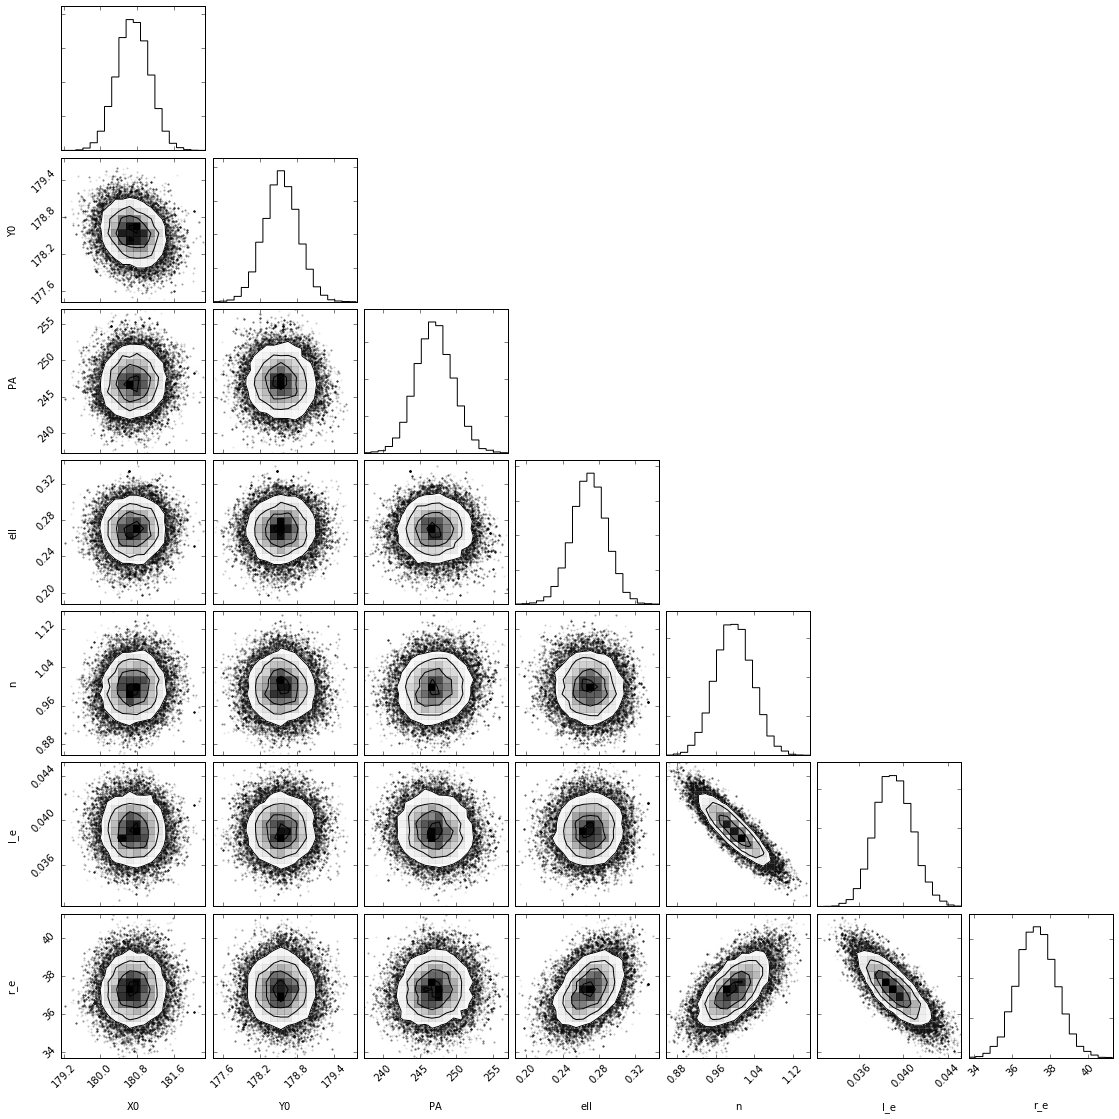

In [5]:
corner.corner(chains, labels=col_names);

In [6]:
mu_0 = []
m_tot = []
for ch in chains:
    params = dict((k,v) for k,v in zip(col_names, ch))
    sersic = pymfit.Sersic(params)
    mu_0.append(sersic.mu_0)
    m_tot.append(sersic.m_tot)    
r_eff = chains[:,6]*0.168
ell = chains[:,3]

In [7]:
def param_value(boots):
    p = np.percentile(boots, [16, 50, 84])
    return p[1], p[1]-p[0], p[2]-p[1]

names = ['mu_0', 'm_tot', 'r_eff', 'ell']
params_chains = [mu_0, m_tot, r_eff, ell]
for name, chain in zip(names, params_chains):
    value = param_value(chain)
    print('{:5} = {:5.2f} (+{:.3f}, -{:.3f})'.format(name, *value))

mu_0  = 24.83 (+0.047, -0.047)
m_tot = 20.31 (+0.027, -0.028)
r_eff =  6.26 (+0.165, -0.173)
ell   =  0.27 (+0.019, -0.019)


Looks like we basically get the same parameter estimates and uncertainties as the bootstrap method.